# Forest Cover Type Prediction using unsupervised Solution

This notebook covers the following [Kaggle Contest](https://www.kaggle.com/competitions/forest-cover-type-prediction) about Forest Cover Type Prediction using unsupervised learning. For this notebook I tried to keep only the numerical columns for better performance of the k-means model.

## Common imports

As dealing with an unsupervised solution, I train for this task a K-Means alternative so I need to import it from sklearn either with other common imports.

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

## Data Reading

The overall project was developed in my local machine, there is no hardware constrain because of the solution low resource consumption.

In [2]:
df = pd.read_csv('../data/forest-cover-type-prediction/train.csv')
df

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0          1       2596      51      3                               258   
1          2       2590      56      2                               212   
2          3       2804     139      9                               268   
3          4       2785     155     18                               242   
4          5       2595      45      2                               153   
...      ...        ...     ...    ...                               ...   
15115  15116       2607     243     23                               258   
15116  15117       2603     121     19                               633   
15117  15118       2492     134     25                               365   
15118  15119       2487     167     28                               218   
15119  15120       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                   0                              510   
1                                  -6                              390   
2                                  65                             3180   
3                                 118                             3090   
4                                  -1                              391   
...                               ...                              ...   
15115                               7                              660   
15116                             195                              618   
15117                             117                              335   
15118                             101                              242   
15119                              78                              270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0                221             232            148  ...            0   
1                220             235            151  ...            0   
2                234             238            135  ...            0   
3                238             238            122  ...            0   
4                220             234            150  ...            0   
...              ...             ...            ...  ...          ...   
15115            170             251            214  ...            0   
15116            249             221             91  ...            0   
15117            250             220             83  ...            0   
15118            229             237            119  ...            0   
15119            189             244            164  ...            0   

       Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0                0            0            0            0            0   
1                0            0            0            0            0   
2                0            0            0            0            0   
3                0            0            0            0            0   
4                0            0            0            0            0   
...            ...          ...          ...          ...          ...   
15115            0            0            0            0            0   
15116            0            0            0            0            0   
15117            0            0            0            0            0   
15118            0            0            0            0            0   
15119            0            0            0            0            0   

       Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0                0            0            0           5  
1                0            0            0           5  
2                0            0            0           2  
3                0            0            0           2  
4                0            0            0           5  
...            ...          ...          ...         ...  
15115            0           

## Data Analysis and Preprocessing

First, I need to drop and analyze for redundant columns in the dataset.

In [3]:
df = df.drop('Id', axis='columns')
df

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0           2596      51      3                               258   
1           2590      56      2                               212   
2           2804     139      9                               268   
3           2785     155     18                               242   
4           2595      45      2                               153   
...          ...     ...    ...                               ...   
15115       2607     243     23                               258   
15116       2603     121     19                               633   
15117       2492     134     25                               365   
15118       2487     167     28                               218   
15119       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                   0                              510   
1                                  -6                              390   
2                                  65                             3180   
3                                 118                             3090   
4                                  -1                              391   
...                               ...                              ...   
15115                               7                              660   
15116                             195                              618   
15117                             117                              335   
15118                             101                              242   
15119                              78                              270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0                221             232            148   
1                220             235            151   
2                234             238            135   
3                238             238            122   
4                220             234            150   
...              ...             ...            ...   
15115            170             251            214   
15116            249             221             91   
15117            250             220             83   
15118            229             237            119   
15119            189             244            164   

       Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  Soil_Type33  \
0                                    6279  ...            0            0   
1                                    6225  ...            0            0   
2                                    6121  ...            0            0   
3                                    6211  ...            0            0   
4                                    6172  ...            0            0   
...                                   ...  ...          ...          ...   
15115                                1282  ...            0            0   
15116                                1325  ...            0            0   
15117                                1187  ...            0            0   
15118                                 932  ...            0            0   
15119                                 914  ...            0            0   

       Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
0                0            0            0            0            0   
1                0            0            0            0            0   
2                0            0            0            0            0   
3                0            0            0            0            0   
4                0            0            0            0            0   
...            ...          ...          ...          ...          ...   
15115            0            0            0            0            0   
15116            0            0            0            0            0   
15117            0            0            0     

### Dealing with numeric variables

As I mention, dealing with redundant columns is important, in the following heatmap you can see that the redundant column is in fact 'Hillshade_9am'.

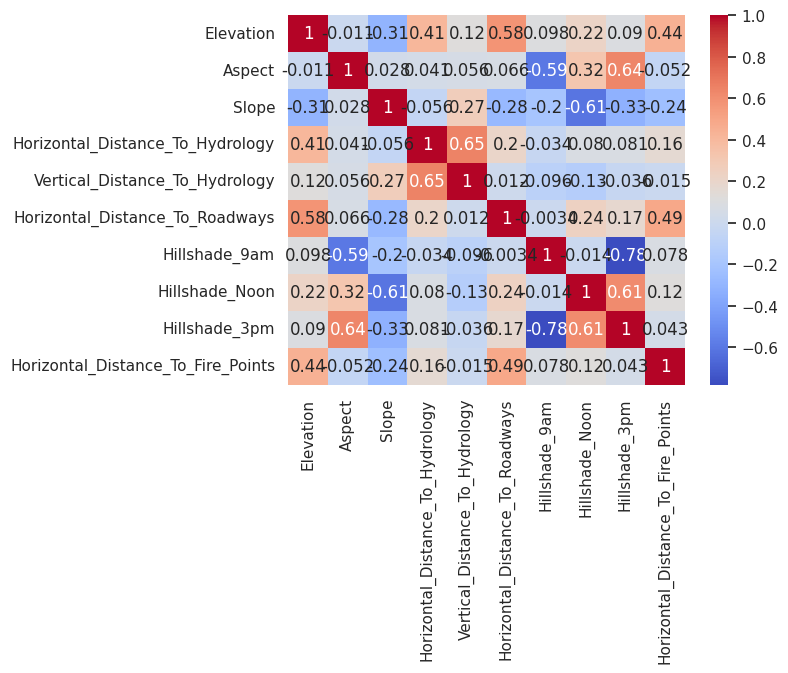

In [4]:
numeric_cols = list()

for col in df.columns:
    if len(df[col].unique()) > 10:
        numeric_cols.append(col)

corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.savefig('../figures/correlation_numeric.jpg')
plt.show()

### Pairplot of numeric variables

Another way to see the correlation between numeric variables is a pairplot.

In [5]:
sns.pairplot(df[numeric_cols])

plt.savefig('../figures/pairplot_of_numeric_variables.jpg')
plt.show()

In [6]:
df = df.drop('Hillshade_9am', axis='columns')

### Label count

I need to see if the dataset is balanced, so I made a countplot for this task. As you can see in the next figure, the dataset is completely balanced.

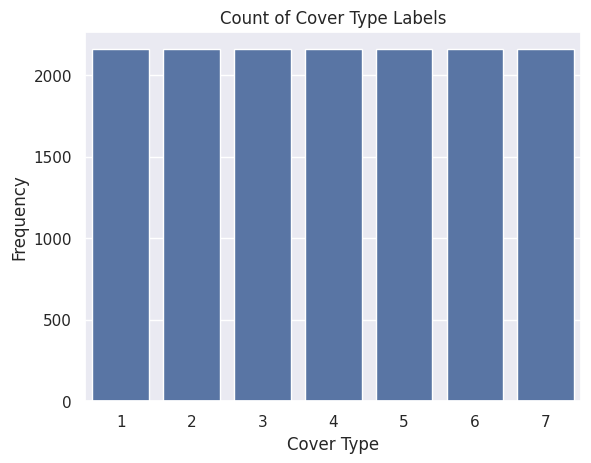

In [7]:
sns.countplot(x="Cover_Type", data=df)
plt.xlabel("Cover Type")
plt.ylabel("Frequency")
plt.title("Count of Cover Type Labels")
plt.savefig('../figures/cover_type_countplot.jpg')
plt.show()

### Target parsing

Looking to the model do not give us '0' label by error, I parsed to the label - 1

In [8]:
df['Cover_Type'] = df['Cover_Type'].apply(lambda x: x-1)

## Model Training

Then I start separating the data and build a simple pipeline for model training using numeric columns, look that I recalculate the numerical columns again becaus I just droped one of them.

In [9]:
numeric_cols = list()

for col in df.columns:
    if len(df[col].unique()) > 10:
        numeric_cols.append(col)
numeric_cols

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points']

In [10]:
X = df.drop('Cover_Type', axis='columns')
y = df['Cover_Type']
order_columns = numeric_cols

* Here some aditional thing I made is fix the PCA components from 2 to 20.

In [11]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('kmeans', KMeans())
])

param_grid = {
    'pca__n_components': list(range(2,21)),
    'kmeans__n_clusters': [7]
}

### Fit the model

I fit the model using the previous define architecture using all available cores.

In [12]:
grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)

grid.fit(X[order_columns], y)

/home/reikia/anaconda3/envs/gan-project/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
55 fits failed out of a total of 95.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/reikia/anaconda3/envs/gan-project/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/reikia/anaconda3/envs/gan-project/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/reikia/anaconda3/envs/gan-pr

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('kmeans', KMeans())]),
             n_jobs=-1,
             param_grid={'kmeans__n_clusters': [7],
                         'pca__n_components': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15, 16, 17, 18, 19,
                                               20]})

In [13]:
best_model = grid.best_estimator_

best_params = grid.best_params_

print(grid.best_score_)
print(best_model)

-2930.8221038215092
Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('kmeans', KMeans(n_clusters=7))])


## Predict the test data

Finally, I starting making the same preprocessing step for the test data, and predicting it for the submission file.

In [14]:
df_test = pd.read_csv('../data/forest-cover-type-prediction/test.csv')
ans = df_test[['Id']]
to_model_df = df_test.drop('Id', axis='columns')
to_model_df = to_model_df.drop('Hillshade_9am', axis='columns')
ans['Cover_Type'] = best_model.predict(to_model_df[order_columns])
ans['Cover_Type'] = ans['Cover_Type'].apply(lambda x: x + 1)
ans

/tmp/ipykernel_11270/172913978.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ans['Cover_Type'] = best_model.predict(to_model_df[order_columns])
/tmp/ipykernel_11270/172913978.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ans['Cover_Type'] = ans['Cover_Type'].apply(lambda x: x + 1)


Id  Cover_Type
0        15121           4
1        15122           4
2        15123           6
3        15124           6
4        15125           6
...        ...         ...
565887  581008           7
565888  581009           7
565889  581010           7
565890  581011           7
565891  581012           7

[565892 rows x 2 columns]

In [15]:
ans.to_csv('../results/answer_unsupervised_only_numeric_cols.csv', index=False)

## Model Saving

And then for reproducitibility, I saved the model in a fixed path.

In [16]:
import joblib

joblib.dump(best_model, '../results/best_model_unsupervised_only_numeric_cols.pkl')

['../results/best_model_unsupervised_only_numeric_cols.pkl']

## Conclusions

In this notebook I trained a K-means unsupervised solution for Forest Cover Classification. The repository is attached with other two notebooks with a K-Means with the previous one using all columns and a Supervised Solution using Random Forest. In future works it is possible to test other models, unsupervised and supervised to improve the given score.

Best score for this model: 0.09718

Leaderboard position: 1682
